# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Manliguez, Sean Arthur\
_Student No._: 2020-07582\
_Section_: TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


# PART 1

# Generating Datasets
The code below generates `N` number of points of a sine function. The variable `eps` introduces noise to the datasets by adding a set of randomly generated numbers from `mu` to `sigma`. This can be thought of as a deviation from the otherwise smooth curve of the sine function.

In [ ]:
mu = 0
sigma = 0.1
N = 100 #number of points
max_d = 14 #maximum polynomial degree
x = np.linspace(0,3,N) #generating the x-values of the plot
np.random.seed(126) #setting the seed for replicability
eps = np.random.normal(mu, sigma, N) # introducing 'noise' or error by randomly generating numbers from 0 to 0.1
y = x*np.sin(x) + eps #the sine function with noise-introduced

---
## Visualizing the Plot
Plotting the function below, we can see that the dataset vaguely resembles a sine-function. Having 100 as the number of points makes the discreteness clear which consequently makes the error apparent.

The variable `sigma` ($\sigma$) affects the spread of the data points. Increasing the value of `sigma` increases the spread of the data. Indeed, it is evident in the plots of $\sigma = 0.1$ and $\sigma =0.5$ that a higher $\sigma$ has a larger deviation from the sine function. This will have consequences that will be seen later in the curve fitting.

In [ ]:
sigma2 = 0.5
eps2 = np.random.normal(mu, sigma2, N) #introducing noise by randomly generating numbers from 0 to 0.5
y2 = x*np.sin(x) + eps2


#### Plotting of the dataset at $\sigma = 0.1$ and $\sigma = 0.5$

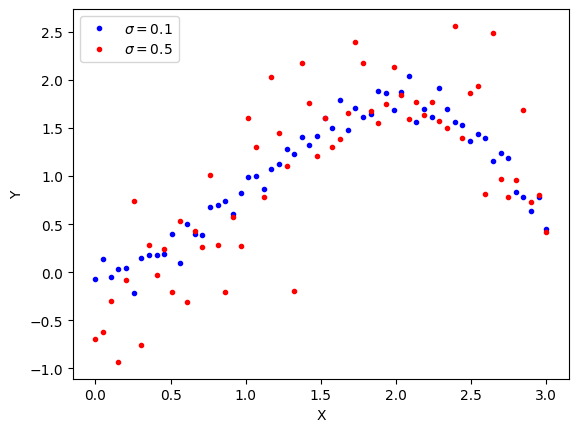

In [ ]:
plt.plot(x,y, ls ='none', marker = '.', color = 'b', label = "$\sigma = 0.1$")
plt.plot(x,y2, ls ='none', marker = '.', color ='r', label = "$\sigma = 0.5$")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

---
# PART 2

#Training

### Splitting dataset

Dividing the dataset is essential in the development of the model. This affects how the 'weights' of the model is determined and adjusted. In this model, the dataset is divided into training, validation, and testing. The model is trained using the training set and then evaluated using the validation set where the underfitting or overfitting of the model is usually identified.

The code below prepares the dataset for training by splitting it into the training set, cross-validation set, and testing set. For this model, the split is 50-25-25 for training-validation-testing. In order to do this, the function `train_test_split()` of `sklearn` first splits the dataset in half to get the training set by assigning `train_size = 0.5`. Next, the remaining portion is split again in half to divide them into the validation set and the testing set. The argument `random_state = 42` is set to allow replicability and for easier debugging.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,train_size = 0.50, random_state = 42) #splitting the data set into training and cross-validation/testing
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test.copy(),Y_test.copy(), train_size = 0.50, random_state = 42) #splitting dataset into cross-validation and testing

### Curve-fitting

Essentially, the dataset are points (x,y) which can be plotted in a scatter-plot. Since the dataset was initialized using a sine-function, a polynomial of a certain degree can theoretically be fitted onto that dataset.

In the code below, `np.polyfit(x,y,d)` determines the coefficients of the polynomial to be fitted onto the datasets. With `d=3`, the polynomial generated is of the 3rd degree which means that the resulting output is an array with 4 elements, each corresponding to the coefficients $a,b,c,d,$ of the function in the form of $$f(x) = ax^3 + bx^2 + cx+ d$$.

Initializing the `best-fit = np.poly1d()` allows for a convenient plotting of the curve. This makes the substitution of x-values (`X_train`) to the function above more convenient.

In [ ]:
d = 3 #polynomial degree
best_fit = np.poly1d(np.polyfit(x,y,d)) #fits a polynomial function with degree 'd' on the dataset with points (x,y)
best_fit
best_y = best_fit(X_train) #plugs in the x-values to get the y-values of the best-fit curve

### Plotting of the dataset with the best-fit line

In the plot below, the points in magenta are the points for the best-fit line which clearly follows the trend of the training set (the points in blue).

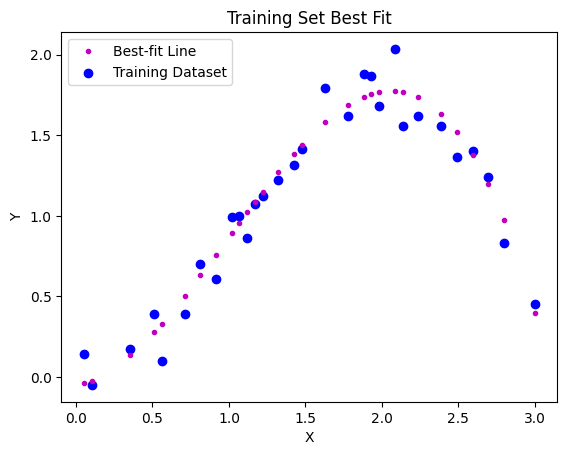

In [ ]:
fig1 = plt.figure()
plt.plot(X_train,best_y, ls = 'none', marker = '.', label = 'Best-fit Line', c ='m') #plotting the best-fit line with best_y as the y-values corresponding to the x-values, X_train
plt.scatter(X_train,Y_train, c = 'b', label = "Training Dataset")#plotting the training set with Y_train as the y-values corresponding to the x_values, X_train
plt.title('Training Set Best Fit')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

---
## Calculating the RMSE

The point of splitting the dataset into training, validation, and testing is to create a model that would accurately fit a curve on to the dataset. This is determined by finding the function of the best-fit curve which would minimize the root-mean-square error (RMSE) given by the equation below.

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(Y_i-\hat{Y}_i)^2
$$

$$RMSE = \sqrt{MSE}$$

The function `get_bestfit(x,y,d)` determines the best-fit weights of the best-fit function $f$ of degree `d`. It returns a `poly1d` array to be used to determine $f(x)$.

The function `calculate_rmse(n,y,y_curve)` calculates for the RMSE of the best-fit function fitted to the dataset.

In [ ]:
def get_bestfit(x,y,d): #format get_bestfit(x-values,y-values,degree)
  best_fit = np.poly1d(np.polyfit(x,y,d)) #gets the weights of the function of degree d
  return best_fit #returns the poly1d array
def calculate_rmse(n,y,y_curve): #format calcualte_rmse(no. of points, y-values of dataset, y-values of best-fit curve)
  mse = (1/n)*np.sum((y_curve-y)**2) #calculates the mean-square error
  rmse = np.sqrt(mse) #sqrt of the mean-square error
  return rmse

---
### Plotting best fit curves of varying degree polynomial

The code below visualizes the best-fit curve of the training set at various polynomial degrees from $d=0$ to $d=1$

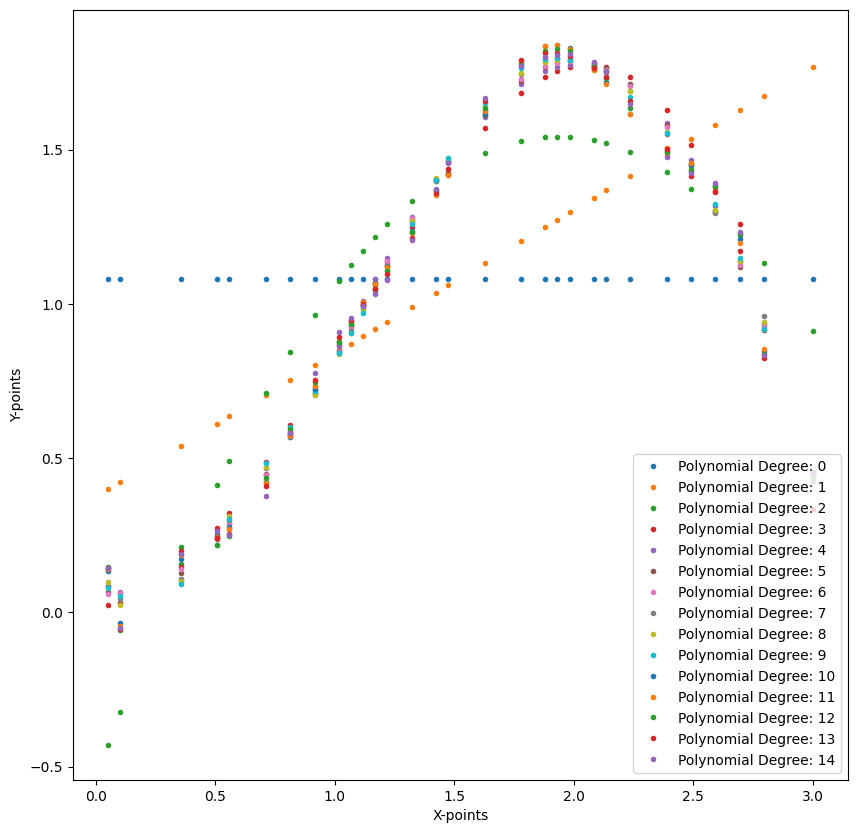

In [ ]:
fig2 = plt.figure(figsize = (10,10))
max_d = 14
for i in range(max_d+1): #plots each best-fit function recursively
  best_fit = get_bestfit(X_train, Y_train, i)
  plt.plot(X_train, best_fit(X_train), ls = 'none', marker = '.', label = 'Polynomial Degree: %i' %i)
plt.xlabel("X-points")
plt.ylabel("Y-points")
plt.legend(loc = 'lower right')

---
## Calculate RMSE of training set

The code below calculates for the RMSE of each function fitted to the training set from polynomial degree $d=0$ to $d-14$

In [ ]:
training_rmse_list = [] #empty list to hold hold the rmse at each polynomial degree
d_list = np.arange(0,max_d+1) #array with values 0 to 14 in integer steps, corresponding to each polynomial degree
for i in range(max_d+1): #recursively fills the training_rmse_list
  best_curve = get_bestfit(X_train,Y_train,i) #determines the function of the best-fit curve with degree i
  Y_train_best = best_curve(X_train) #determines the y-values of the funtion of the best-fit curve
  rmse = calculate_rmse(len(X_train),Y_train,Y_train_best) # calculates the RMSE of the given function
  training_rmse_list.append(rmse)
print(training_rmse_list)

[0.5844418655658572, 0.446662160328364, 0.2531629740940398, 0.12116370069204724, 0.11547747376686816, 0.11461142409325832, 0.11449199050048825, 0.1132867563250366, 0.11295096086595706, 0.11224617389236384, 0.10307117194060664, 0.10286660357566675, 0.10149314945184526, 0.10041169040429983, 0.09921842510120459]


## Calculate RMSE of crossvalidation set

The code below calculates for the RMSE of each function fitted to the training set from polynomial degree $d=0$ to $d-14$. By comparing the RMSE of the crossvalidation and the training set, we can determine whether the function is overfitting or underfitting the dataset.

In [ ]:
crossvalid_rmse_list = []  #empty list to hold the rmse at each polynomial degree
d_list = np.arange(0,max_d+1) #array with values 0 to 14 in integer steps, corresponding to each polynomial degree
for i in range(max_d+1): #recursively fills the crossvalid_rmse_list
  best_curve = get_bestfit(X_train,Y_train,i) #determines the function of the best-fit curve with degree i
  Y_valid_best = best_curve(X_valid) # determines the y-values of the function of the best-fit curve
  rmse = calculate_rmse(len(X_valid),Y_valid,Y_valid_best) #calculates the RMSE of a given function
  crossvalid_rmse_list.append(rmse)
print(crossvalid_rmse_list)

[0.6598530460104235, 0.49359392223761595, 0.20117210651291884, 0.09836820652739862, 0.10618702207809029, 0.10110946121195694, 0.09875116500608505, 0.1074593975108911, 0.12114939895869842, 0.10773960901557571, 0.23893961543234318, 0.24495383920060587, 0.3387750125460141, 0.36513628617142835, 0.18511139461876303]


---
## Visualizing the RMSE of the training and crossvalidation set as a function of polynomial degree

From the plot below, the RMSE of the training set **decreases substantially from the the 0th degree to the 3rd degree**. It then starts to **plateau at an RMSE value of approximately 0.1**, which is the $\sigma$ assigned in this randomly generated dataset.

Similar to the training set, the plot of the crossvalidation **decreases substantially from the 0th degree to the 3rd degree**. However, it starts to **increase again at around the 6th degree**. This suggests that polynomial functions with degree higher than 5 or 6 *overfits the dataset*, while functions lower than degree 3 *underfits the dataset*.

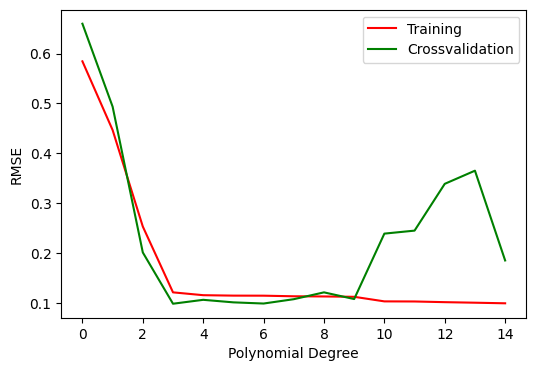

In [ ]:
fig3 = plt.figure(figsize = (6,4))
plt.plot(d_list,training_rmse_list,'r', label = 'Training')
plt.plot(d_list,crossvalid_rmse_list, 'g', label = 'Crossvalidation')
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.legend()

---
# Dataset using an exponential function